## 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [119]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [120]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [121]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


In [122]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [123]:
# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [41]:
# 특정 국가 그룹
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [52]:
# 특정 국가 그룹에 속한 데이터만 필터링
df[df['Country'].isin(country_group)]['Country'].value_counts()

Japan        321
Hong Kong    284
Singapore    222
USA          179
Canada       151
Lebanon       45
Name: Country, dtype: int64

In [53]:
# df_sp 변수 생성 및 확인
df_sp = df[df['Country'].isin(country_group)]
df_sp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


In [54]:
# 국가별 총판매 금액 평균
df_sp_tp_mean = df_sp.groupby('Country')['TotalPrice'].mean()
df_sp_tp_mean

Country
Canada        24.280662
Hong Kong     55.252817
Japan        116.561900
Lebanon       37.641778
Singapore     95.852658
USA           20.002179
Name: TotalPrice, dtype: float64

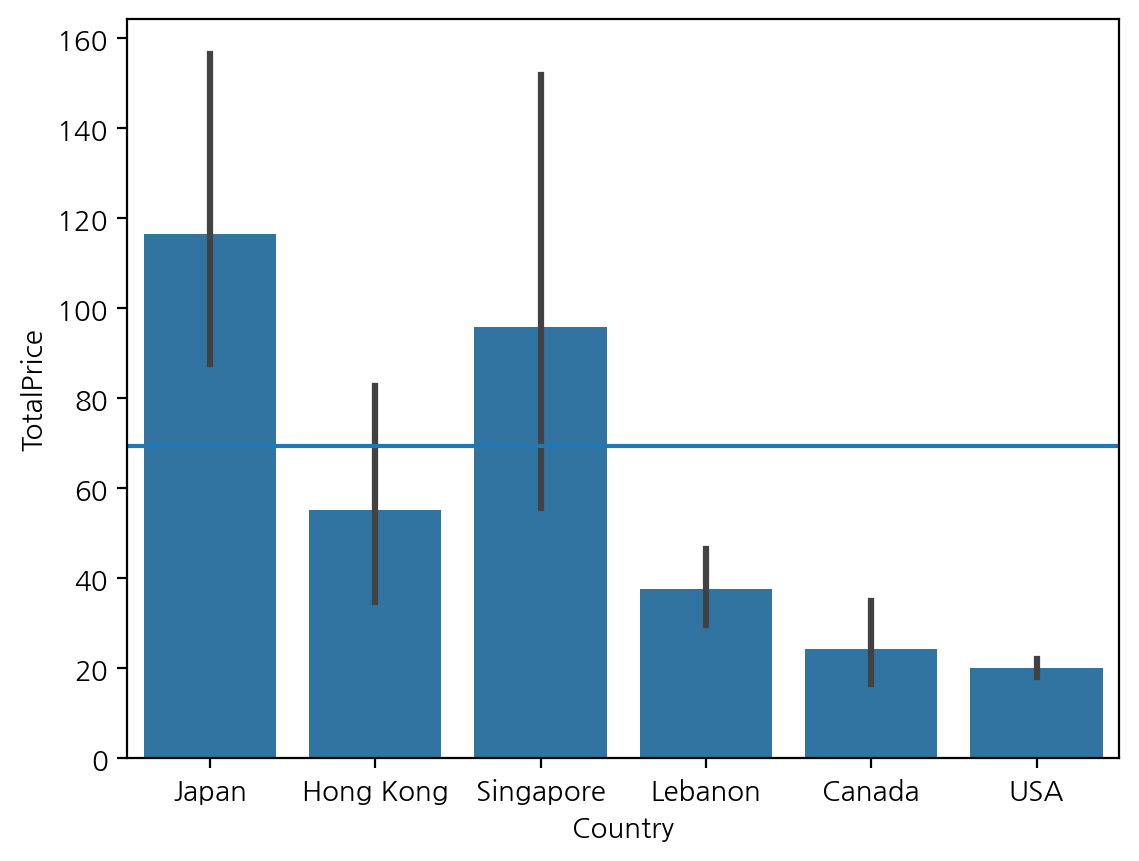

In [55]:
# 국가별 총판매 금액 평균 시각화
sns.barplot(data=df_sp, x='Country', y='TotalPrice')

# 그룹 국가들의 총판매 금액 전체평균
plt.axhline(df_sp['TotalPrice'].mean());

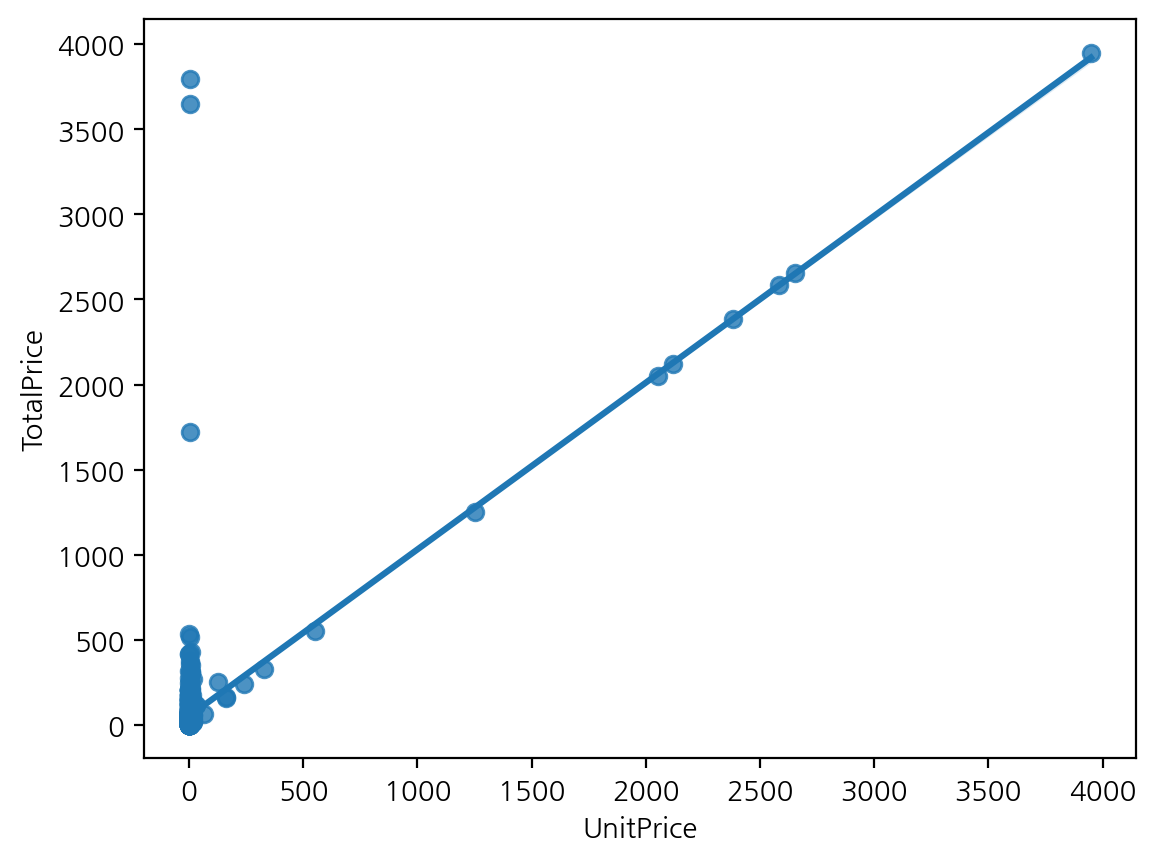

In [73]:
# UnitPrice, Quantity, InvoiceMonth 독립변수와 TotalPrice 종속변수로 상관관계를 확인했으나
# 극단값으로 인해 시각화의 어려움 -> log 스케일링을 하기로 함

# UnitPrice - TotalPrice
sns.regplot(data=df_sp, x='UnitPrice' , y='TotalPrice');

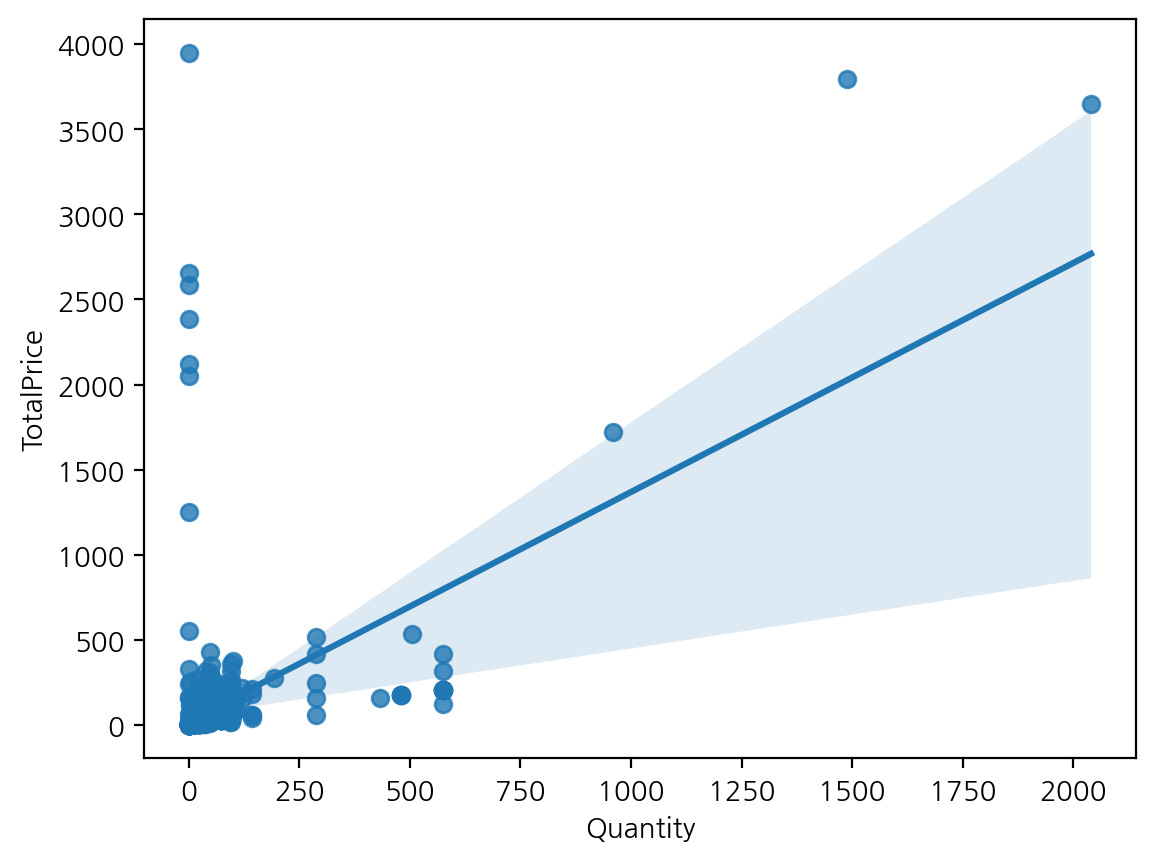

In [74]:
# Quantity - TotalPrice
sns.regplot(data=df_sp, x='Quantity' , y='TotalPrice');

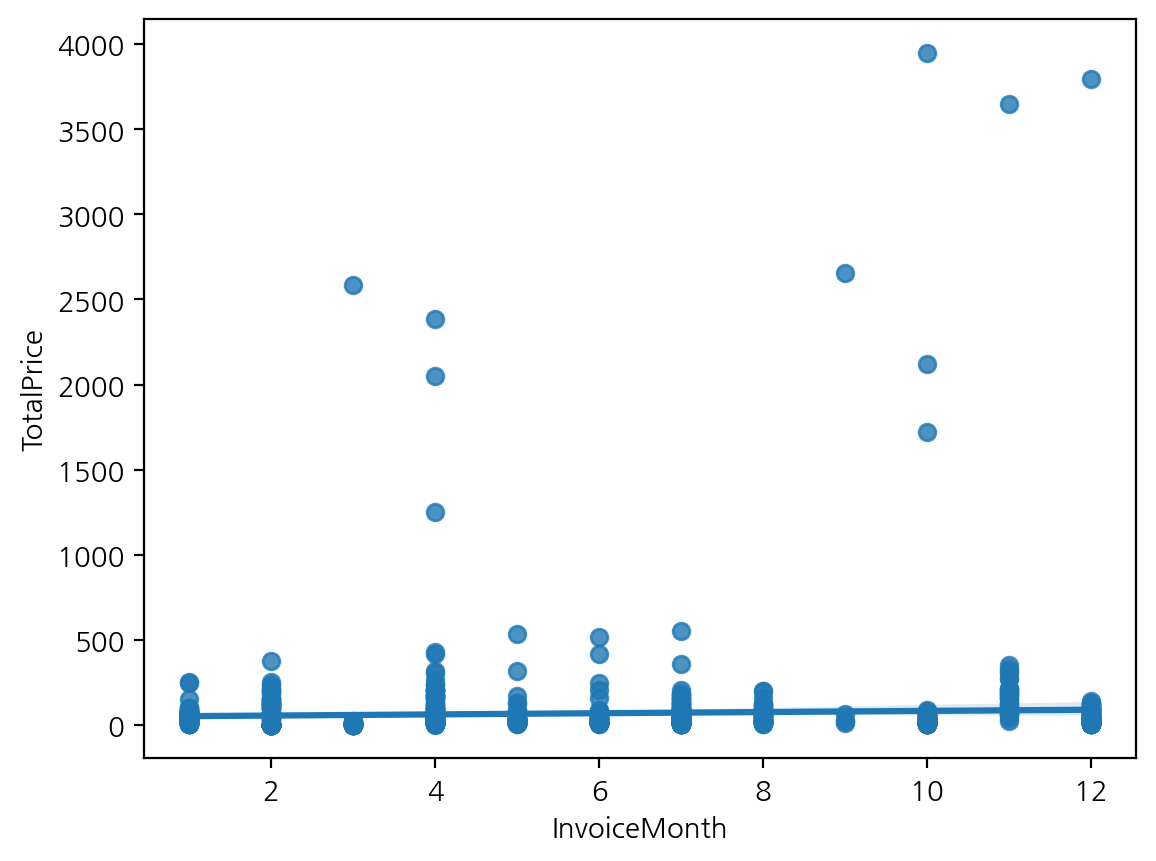

In [75]:
# InvoiceMonth - TotalPrice
sns.regplot(data=df_sp, x='InvoiceMonth' , y='TotalPrice');

In [57]:
# log transformation
df_sp["TotalPrice_log"] = np.log(df_sp["TotalPrice"] + 1)
df_sp["Quantity_log"] = np.log(df_sp["Quantity"] + 1)
df_sp["UnitPrice_log"] = np.log(df_sp["UnitPrice"] + 1)

<ipython-input-57-8e1ea65a8b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["TotalPrice_log"] = np.log(df_sp["TotalPrice"] + 1)
<ipython-input-57-8e1ea65a8b49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["Quantity_log"] = np.log(df_sp["Quantity"] + 1)
<ipython-input-57-8e1ea65a8b49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

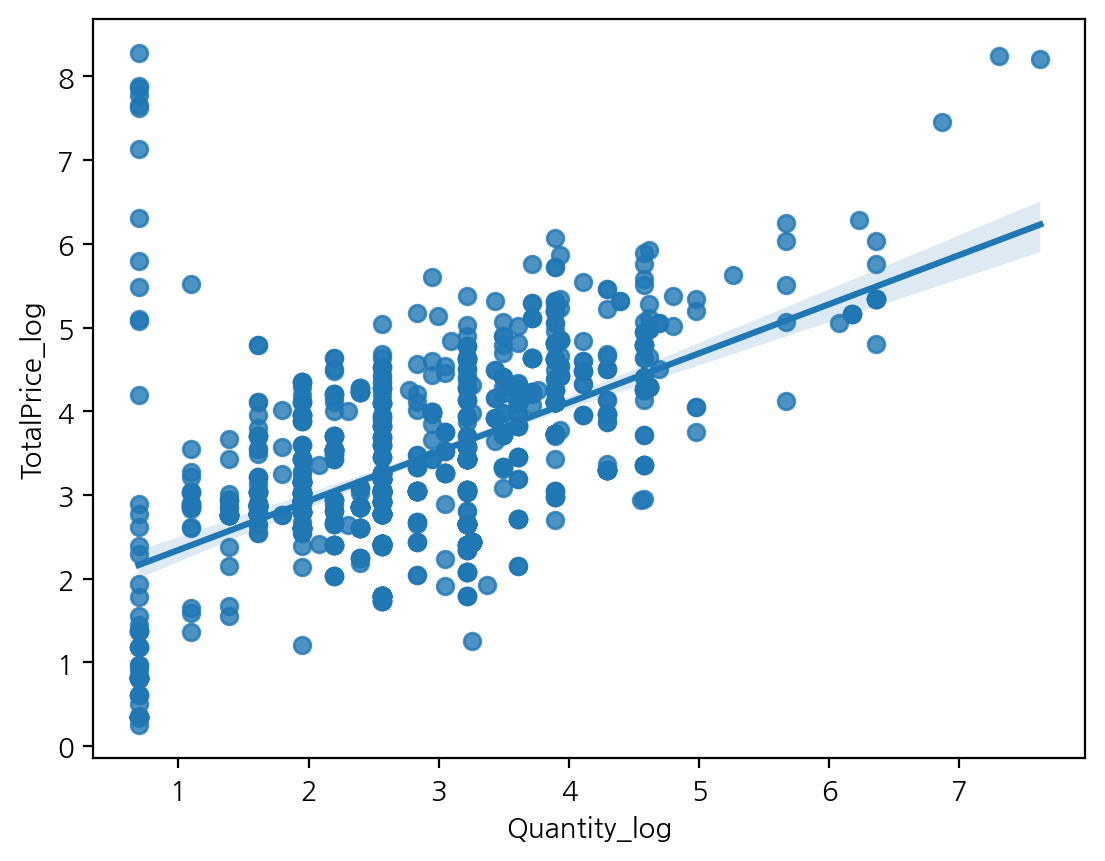

In [58]:
# 로그 변환한 Quantity_log, TotalPrice_log 사이의 산점도
sns.regplot(data=df_sp, x='Quantity_log' , y='TotalPrice_log');

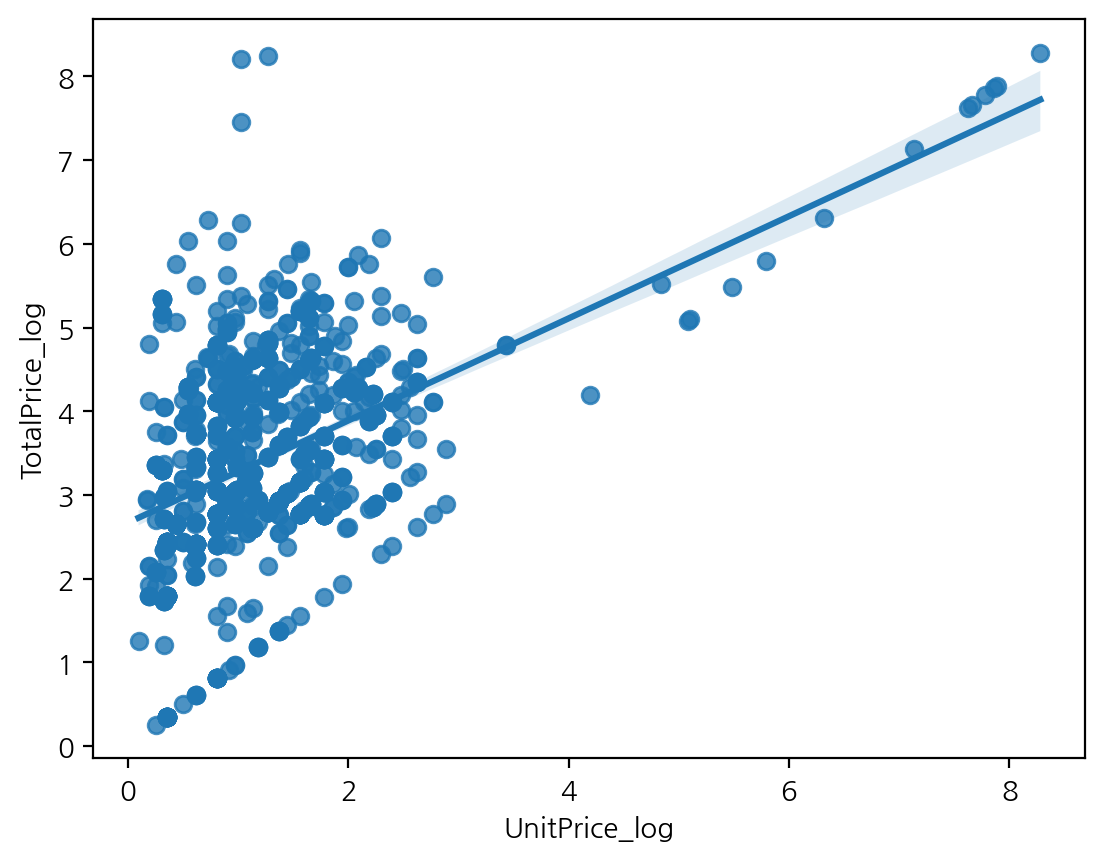

In [59]:
# 로그 변환한 UnitPrice_log, TotalPrice_log 사이의 산점도
sns.regplot(data=df_sp, x='UnitPrice_log' , y='TotalPrice_log');

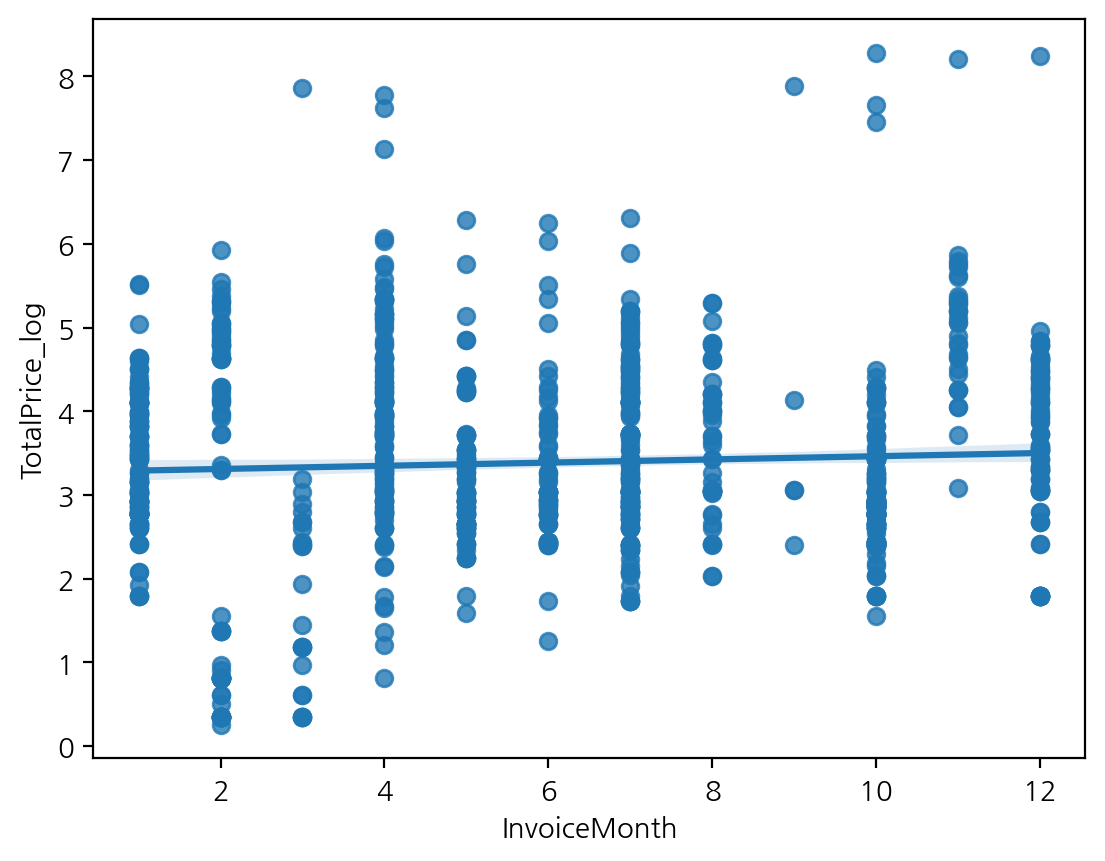

In [77]:
# 로그 변환한 TotalPrice_log, 변환하지 않은 InvoiceMonth 사이의 산점도
sns.regplot(data=df_sp, x='InvoiceMonth' , y='TotalPrice_log');

In [60]:
# 전체 변수와 개별 변수를 합쳐서 시각화 하기
sub_nations = df_sp.copy()
sub_nations["Country"] = "all"
df_all = pd.concat([sub_nations, df_sp])
df_all['Country'].value_counts()

all          1202
Japan         321
Hong Kong     284
Singapore     222
USA           179
Canada        151
Lebanon        45
Name: Country, dtype: int64

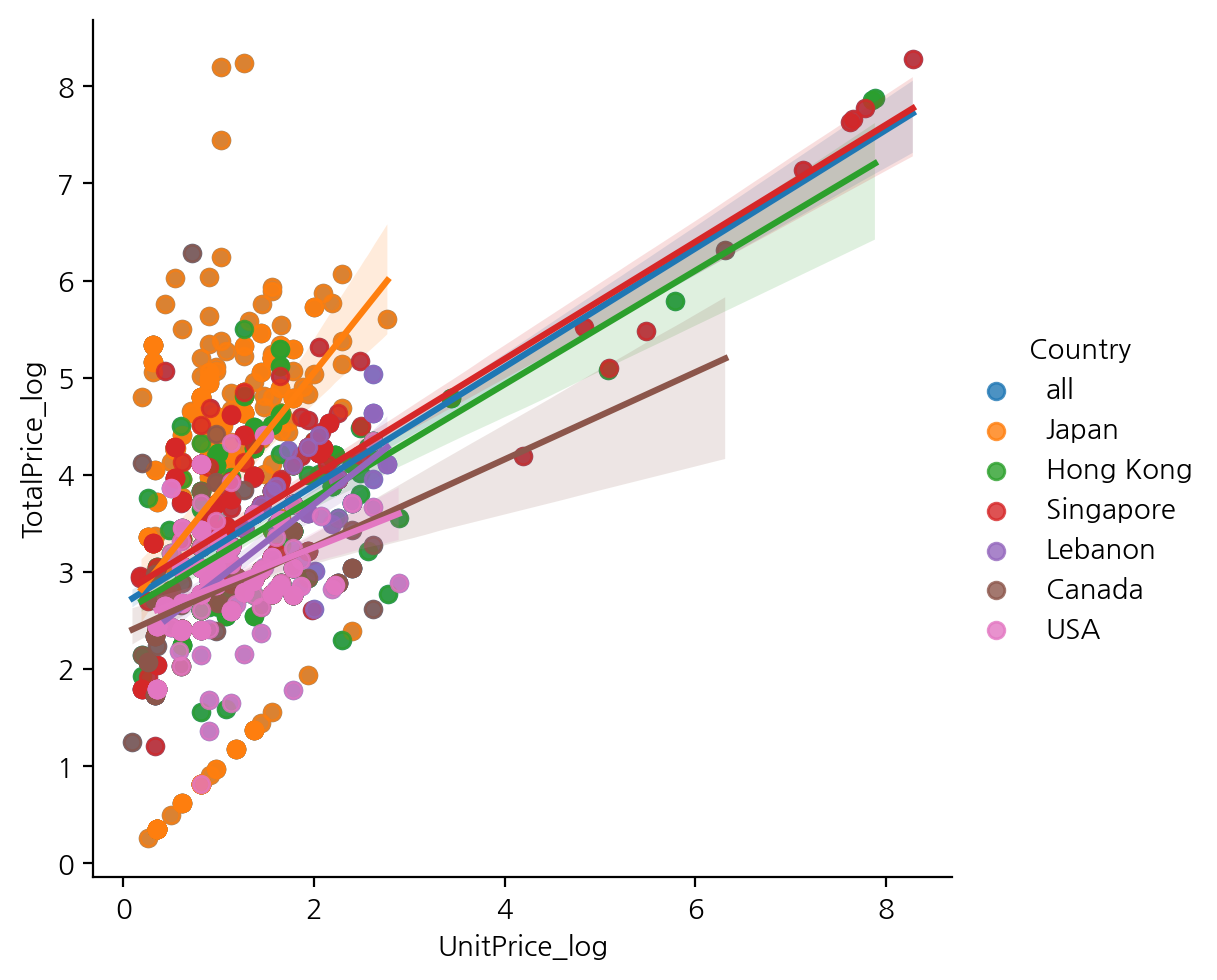

In [68]:
# UnitPrice_log,  TotalPrice_log 변수의 회귀선 시각화
sns.lmplot(data=df_all, x='UnitPrice_log' , y='TotalPrice_log', hue='Country');

### 해석 1)


- 위 그래프(UnitPrice_log,  TotalPrice_log 변수의 회귀선)는 전체 회귀 직선과 그룹 간 회귀 직선이 모두 양의 상관관계를 나타내므로 심슨의 역설을 설명하는데 적절하지 않다.

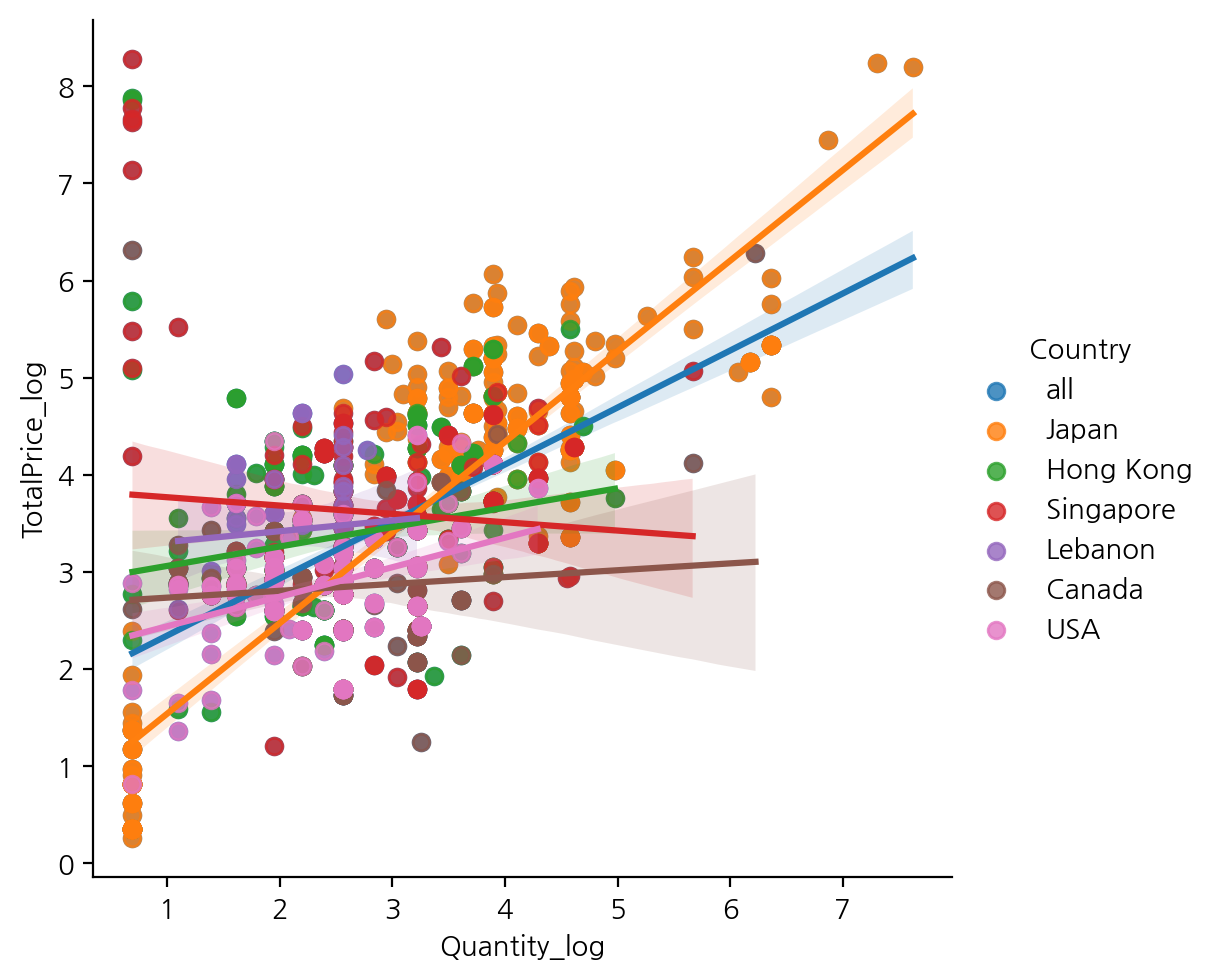

In [61]:
# Quantity_log, TotalPrice_log 변수의 회귀선 시각화
sns.lmplot(data=df_all, x='Quantity_log' , y='TotalPrice_log', hue='Country');

### 해석 2)


1. 위 그래프(Quantity_log, TotalPrice_log 변수의 회귀선)를 보면 전체 데이터는 양의 상관관계를 보인다.


2. 그러나 개별 국가별 데이터의 상관관계를 확인해 보면 일본, 미국을 제외한 나머지 국가들은 두 변수에서 큰 상관관계를 보이지 않는다.


3. 오히려 일본의 데이터가 전체 상관계수를 크게 끌어 올린 모습을 확인할 수 있다.


4. 이 경우 일본, 미국을 제외한 대부분의 국가들의 데이터는 Quantity_log, TotalPrice_log 변수가 서로 독립적이나 전체 데이터를 확인하면 강한 양의 상관관계를 보이므로 심슨의 역설과 연관시켜 해석할 수 있다.

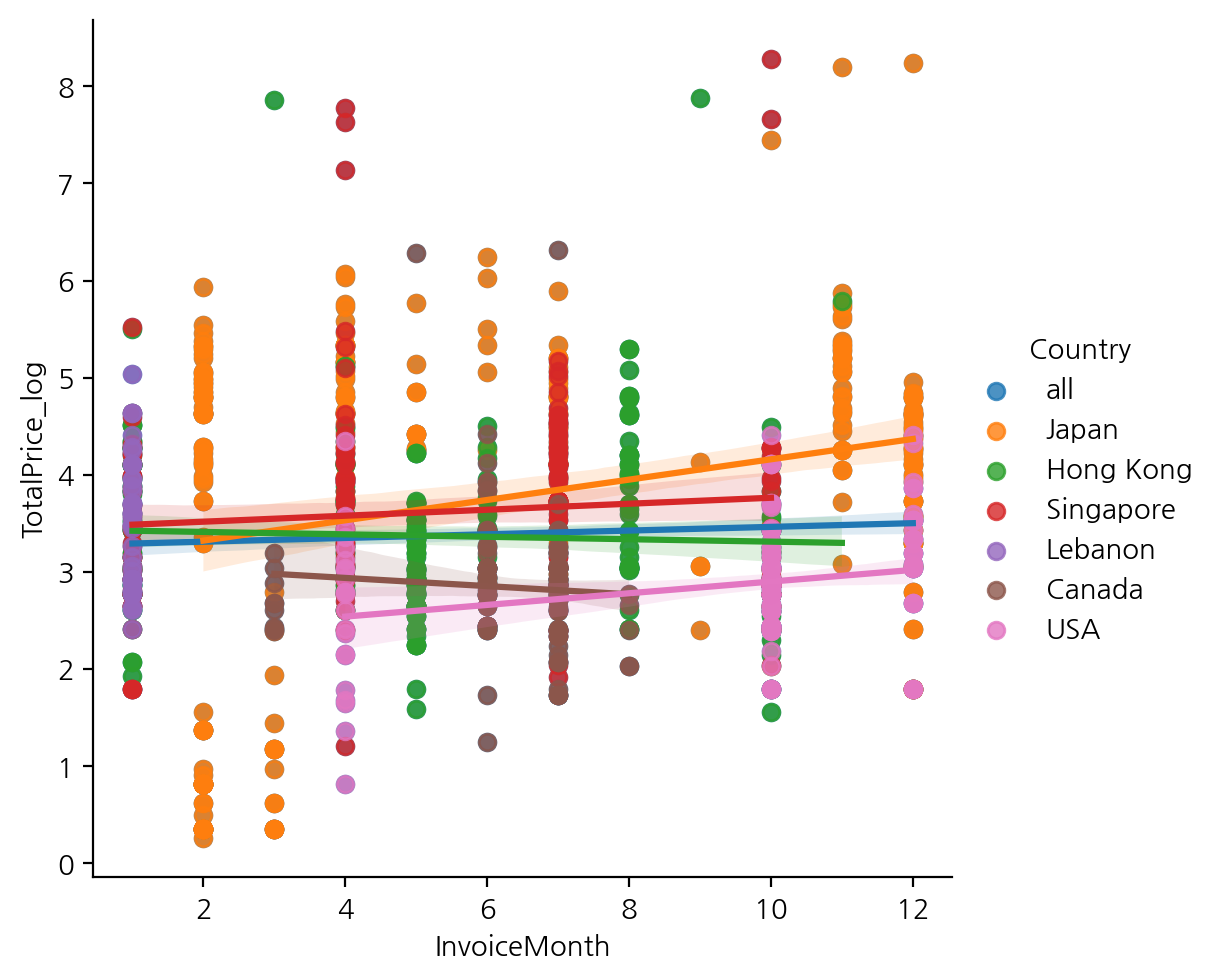

In [78]:
# InvoiceMonth, TotalPrice_log 변수의 회귀선 시각화
sns.lmplot(data=df_all, x='InvoiceMonth' , y='TotalPrice_log', hue='Country');

### 해석 3)

1. 위 그래프를 확인하면 전체 국가 데이터와 개별 국가들의 InvoiceMonth, TotalPrice_log 변수 간 관계는 모두 수평에 가까움을 확인할 수 있는데, 이는 상관관계가 거의 없고 두 변수가 서로 독립적임을 의미한다.

### - 위 세가지 독립변수 중 심슨의 역설과 연관시킬 수 있는 Quantity_log 변수만 상관관계 분석을 시행하도록 한다.

In [65]:
# 국가 간 Quantity_log, TotalPrice_log 상관계수 구하기
corr_country_1 = df_sp.groupby('Country')[['Quantity_log', 'TotalPrice_log']].corr()
corr_country_1

Quantity_log  TotalPrice_log
Country                                               
Canada    Quantity_log        1.000000        0.093517
          TotalPrice_log      0.093517        1.000000
Hong Kong Quantity_log        1.000000        0.195093
          TotalPrice_log      0.195093        1.000000
Japan     Quantity_log        1.000000        0.874586
          TotalPrice_log      0.874586        1.000000
Lebanon   Quantity_log        1.000000        0.081310
          TotalPrice_log      0.081310        1.000000
Singapore Quantity_log        1.000000       -0.078912
          TotalPrice_log     -0.078912        1.000000
USA       Quantity_log        1.000000        0.377815
          TotalPrice_log      0.377815        1.000000

<Axes: ylabel='Country-None'>

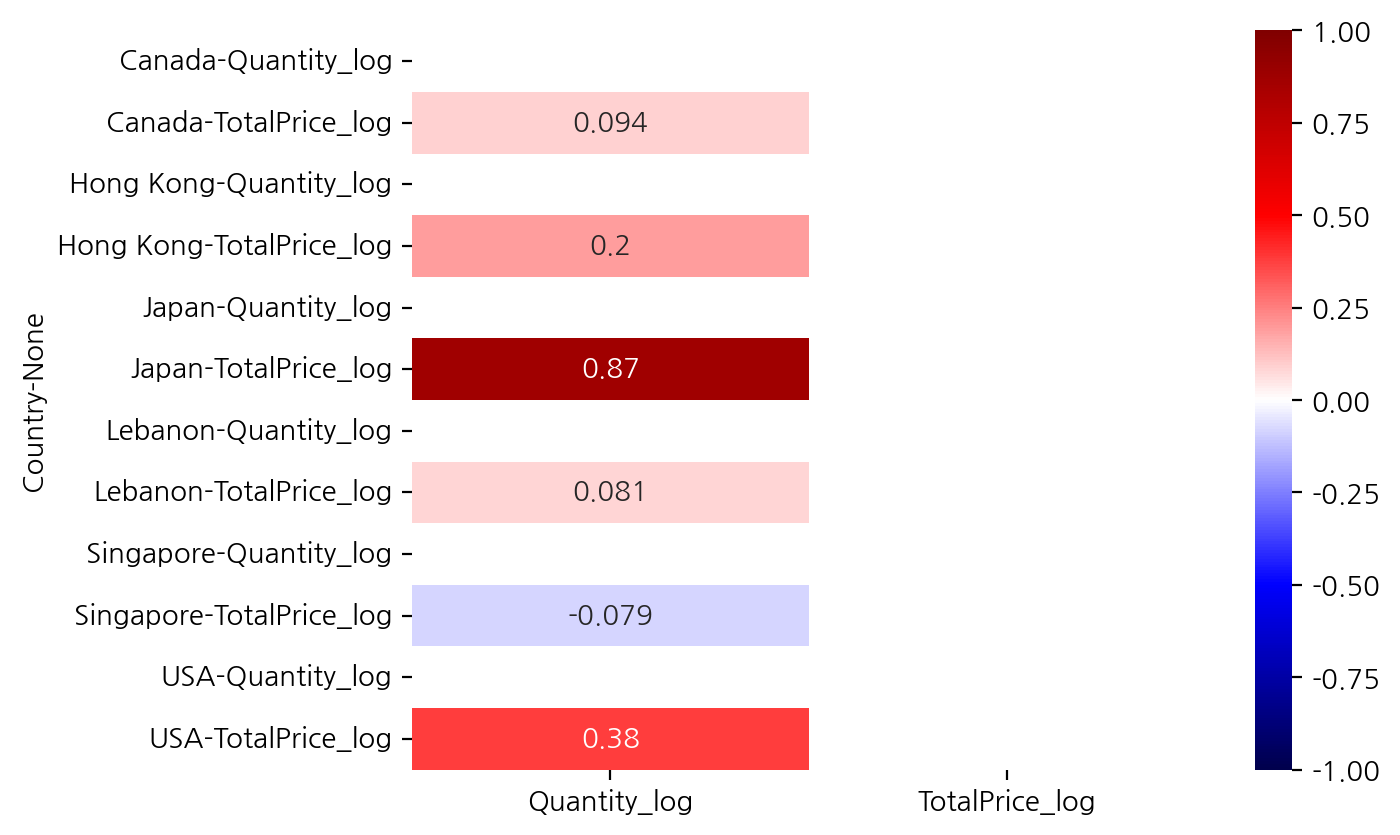

In [67]:
# 마스크 설정
mask22 = pd.DataFrame(np.triu(np.ones((2, 2))))
mask = np.concatenate([mask22, mask22, mask22, mask22, mask22, mask22])
mask

# 히트맵으로 상관관계 시각화
sns.heatmap(corr_country_1, annot=True, cmap='seismic',
            mask = mask,
            vmin=-1, vmax=1)

### 해석 3)


1. 위 회귀직선 그래프에서 확인했듯이, 상관관계 히트맵에서도 일본과 미국이 각각 0.87, 0.38로 Quantity_log, TotalPrice_log 변수 사이 양의 상관관계가 있음을 확인할 수 있다.


2. 나머지 국가들은 미미한 상관관계 또는 두 변수가 서로 독립적인 상관계수(캐나다: 0.094, 홍콩: 0.2, 레바논: 0.081, 싱가포르: -0.079)를 확인할 수 있다.

### 미션 1) 비즈니스적 해석


1. 데이터 분석을 통해 일본의 경우 평균 총판매금액이 6개 국가 중 가장 높고, 판매금액과 주문수량에 강한 양의 상관관계를 보이는 것을 확인할 수 있다.


2. 이러한 점을 바탕으로 규모의 경제와 연관된 판매 전략을 생각할 수 있다.


3. 추가적인 분석을 통해 일본 사람들이 주로 어떤 제품을 많은 수량으로 구매하는지 파악하고, 해당 제품의 대량으로 준비하여 원가를 떨어뜨린다.


4. 원가를 줄이는 것이 가능하다면 이를 바탕으로 해당 제품의 주문 수량에 비례한 할인 프로모션을 진행할 수 있다.


5. 그러면 기존 고객들의 이해와 맞아 떨어지면서 평균 구매금액이 많은 일본 소비자들의 충성도를 지속적으로 유지할 수 있을 것이다.

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [70]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가
X.shape, y.shape

((530104, 2), (530104,))

In [71]:
# statsmodel 의 OLS 를 통한 단순 선형회귀 분석
model_ols = sm.OLS(y, X).fit()
model_ols

In [72]:
# 단순 회귀분석 결과 확인
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:19:41   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.000      15.355      16.805
UnitPrice      1.0343      0.010    100.999      0.000       1.014       1.054
================================================================================
Omnibus:                  3354156.595   Durbin-Watson:                     1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2111068902737906.750
Skew:                         520.634   Prob(JB):                           0.00
Kurtosis:                  309156.253   Cond. No.                           36.3
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 미션 2) 해석


1. 위 회귀 보고서를 보면 y절편은 16.0802, 독립변수 UnitPrice 의 회귀계수는 1.0343 임을 확인할 수 있다.


2. 두 항 모두 p값이 0 에 근사함으로 회귀계수가 통계적으로 유의미함을 확인할 수 있다.


3. 독립변수 UnitPrice 의 회귀계수는 UnitPrice 가 1 단위 증가할 때, TotalPrice 는 평균적으로 1.0343 만큼 증가함을 의미한다.


4. 종속변수 TotalPrice 와 독립변수 UnitPrice 의 결정계수, 즉 R-squared 값은 0.019 임을 확인할 수 있고, 제곱근을 취하여 피어슨 계수는 0.139 임을 확인할 수 있다.


5. R-squared 0.019 값은 독립변수 UnitPrice 의 정보가 종속변수 TotalPrice 분산을 약 2% 설명한 것으로, 상품가격이 총 판매액을 크게 설명하지 못함을 나타낸다.


6. 높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 미션 2) 의 가설과 달리 상품의 가격과 총 판매액은 0.139 의 약한 상관관계를 가지고 있다. UnitPrice 와 TotalPrice 의 산점도를 확인해보면 강한 양의 상관관계가 있는 것처럼 보이지만, 사실 이는 일부 영향값(influential points)에 의해 회귀 직선이 크게 영향을 받아 큰 양의 상관관계가 있는 것처럼 그래프를 왜곡시킨 것으로 생각할 수 있다.

In [76]:
np.sqrt(0.019)

0.13784048752090222

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [149]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")

# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

In [158]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60


In [164]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리.  크리스마스 시즌을 12월 25일 기준 2주 전으로 재설정
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-11"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [166]:
# 크리스마스 시즌인 날과 아닌 날의 비율
df_promotion["IsChristmasPeriod"].value_counts(1)

False    0.607256
True     0.392744
Name: IsChristmasPeriod, dtype: float64

In [168]:
# 크리스마스 상품 관련 비율
df_promotion["IsChristmasProduct"].value_counts()

False    24556
True      1601
Name: IsChristmasProduct, dtype: int64

In [169]:
# 크리스마스 시즌 전후 크리스마스 관련 상품 구매 횟수 비교
df_promotion.groupby('IsChristmasPeriod')['IsChristmasProduct'].sum()

IsChristmasPeriod
False    1180
True      421
Name: IsChristmasProduct, dtype: int64

In [171]:
# 테이블로 확인
pd.crosstab(df_promotion['IsChristmasPeriod'], df_promotion['IsChristmasProduct'])

IsChristmasProduct,False,True
IsChristmasPeriod,,
False,14704,1180
True,9852,421


### 해석 1)
1. 크리스마스 시즌이 아닌 날 크리스마스 관련 상품 구매 비율 : 1180 / 15884 = 0.074


2. 크리스마스 시즌에 크리스마스 관련 상품 구매 비율 : 421 / 10273 = 0.041


3. 위 결과를 보면 2010년 12월 데이터를 가지고 크리스마스 시즌을 판단하고, 관련 상품에 관한 영향을 평가하는 것은 바람직하게 보이지 않는다.


4. 따라서 2010년 12월에 한정된 데이터가 아닌 2011년에 해당하는 전체 데이터를 가지고 12월을 크리스마스 기간으로 정하여 분석하는 것이 합리적이라고 생각한다.

In [176]:
# 2011년 데이터만 사용하기로 한다.
# 프로모션 여부와 시간에 따른 데이터 분리.  크리스마스 시즌을 12월 전체로 설정
df_promotion = df[(df["InvoiceDate"] >= "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] > "2011-11-30"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [177]:
# 크리스마스 시즌인 날과 아닌 날의 비율
df_promotion["IsChristmasPeriod"].value_counts(1)

False    0.947747
True     0.052253
Name: IsChristmasPeriod, dtype: float64

In [178]:
# 크리스마스 상품 관련 비율
df_promotion["IsChristmasProduct"].value_counts()

False    354270
True      17457
Name: IsChristmasProduct, dtype: int64

In [179]:
# 크리스마스 시즌 전후 크리스마스 관련 상품 구매 횟수 비교
df_promotion.groupby('IsChristmasPeriod')['IsChristmasProduct'].sum()

IsChristmasPeriod
False    15834
True      1623
Name: IsChristmasProduct, dtype: int64

In [180]:
# 테이블로 확인
pd.crosstab(df_promotion['IsChristmasPeriod'], df_promotion['IsChristmasProduct'])

IsChristmasProduct,False,True
IsChristmasPeriod,,
False,336469,15834
True,17801,1623


### 해석 2)
1. 크리스마스 시즌이 아닌 날 크리스마스 관련 상품 구매 비율 : 0.045


2. 크리스마스 시즌에 크리스마스 관련 상품 구매 비율 : 0.084


3. 두 비율의 차이가 통계적으로 유의미한지 T-검정을 통해 확인해본다.


- 귀무가설 : 크리스마스 시즌인 날과 아닌 날의 크리스마스 관련 상품 구매 비율에 차이가 없다.
- 대립가설 : 크리스마스 시즌인 날과 아닌 날의 크리스마스 관련 상품 구매 비율에 차이가 있다.


In [188]:
from scipy import stats

In [186]:
df_promotion[df_promotion['IsChristmasPeriod'] == True]['IsChristmasProduct'].sum()

1623

In [187]:

g1 = df_promotion[df_promotion['IsChristmasPeriod'] == True]['IsChristmasProduct']
g2 = df_promotion[df_promotion['IsChristmasPeriod'] == False]['IsChristmasProduct']

In [189]:
# 등분산성 검정
_, p_value_homogeneity = stats.levene(g1, g2)
print(p_value_homogeneity, '\n')


equal_var = True # 등분산성이 가정되는 경우
if p_value_homogeneity < 0.05:
    # 등분산성이 가정되지 않는 경우
    equal_var = False
print(equal_var, '\n')

# 등분산성 검정 결과에 따라 적절한 t-검정 수행
t_statistic, p_value = stats.ttest_ind(g1, g2, equal_var = equal_var)

t_statistic, p_value

1.7258986714341378e-135 

False 



(19.15271169268845, 4.6403707186427065e-81)

## 결과 해석

1. levene 테스트를 통해 크리스마스 시즌 데이터와 아닌 데이터의 분산이 통계적으로 차이가 있음을 확인하였다.


2. 이에 따라 equal_var = False 옵션으로 두 그룹 간 크리스마스 관련 상품 구매 비율의 차이를 t-test 로 검정하였다.


3. 검정 결과 t 통계량은 19.15, p값은 0 에 근사함을 확인할 수 있다.


4. 이는 크리스마스 시즌과 아닌 날에 크리스마스 관련 상품을 구매하는 비율에 통계적으로 차이가 유의미함을 의미한다. 즉 귀무가설을 기각하고 대립가설을 채택하였다.


5. 19.15의 t 통계량은 크리스마스 시즌에 관련 상품 구매 비율이 아닌 날보다 높다는 것을 의미한다.


6. 따라서 이 데이터를 근거로 크리스마스 시즌에 관련 상품에 대한 프로모션을 진행하는 것이 합리적이라는 결론을 얻을 수 있다.

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# 다변량 회귀분석


## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()

In [95]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60


In [125]:
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,12,25.50
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,12,15.30
64,536373,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 09:02:00,4.25,17850.0,United Kingdom,12,25.50
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,12,15.30
...,...,...,...,...,...,...,...,...,...,...
541639,581538,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-09 11:34:00,2.95,14446.0,United Kingdom,12,2.95
541711,581567,21326,AGED GLASS SILVER T-LIGHT HOLDER,144,2011-12-09 11:56:00,0.55,16626.0,United Kingdom,12,79.20
541732,581571,21313,GLASS HEART T-LIGHT HOLDER,1,2011-12-09 12:00:00,0.85,15311.0,United Kingdom,12,0.85
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,12,20.40


In [126]:
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

<ipython-input-126-e8daa3b7f009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'


False    8664
True     2323
Name: Target, dtype: int64

In [135]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'Country']], drop_first=True)
y = df['Target']

### 문제해결 회고

1. pd.get_dummies() 안에 CustomerID 변수가 실수형 데이터로 설정되어 있는데, 이 데이터를 회귀에 사용하려면 명목형 데이터로 변환하는 것이 맞다.


2. 그러나 CustomerID 와 같은 고객 고유 번호는 회귀의 예측변수로 사용하는 것은 적절하지 않으므로 제외하도록 한다.


3. Country 변수는 명목형 데이터로 활용할 수 있으므로 더미 변수를 생성한다. Country 변수에는 24개의 수준이 존재하고, 데이터의 개수 또한 10987개가 있어 다중공선성이 크게 나타나지 않을 것 같지만 원칙대로 reference level을 설정하여 변수의 중복을 방지한다.


4. 이를 위하여 인자 drop_first=True 를 설정하였다.

In [136]:
# 로지스틱 회귀 모델 fit
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 회귀계수 확인
print('intercept ', model.intercept_[0])
print('classes', model.classes_)
pd.DataFrame({'coeff': model.coef_[0]},
             index=X.columns)

intercept  -2.9367367524379824
classes [False  True]


,coeff
UnitPrice,0.667771
Quantity,0.002373
Country_Austria,-0.107203
Country_Belgium,-0.517435
Country_Canada,-0.217135
Country_Channel Islands,0.246103
Country_Cyprus,0.424814
Country_Czech Republic,-0.114736
Country_EIRE,0.356413
Country_Finland,0.016743


In [137]:
# 회귀 결과 로그 오즈 값 확인
pred = pd.DataFrame(model.predict_log_proba(X),
                    columns=model.classes_)
print(pred.describe())

              False         True 
count  10987.000000  10987.000000
mean      -0.282215     -1.783978
std        0.393844      0.652114
min       -7.593694     -4.260583
25%       -0.320355     -2.386857
50%       -0.150978     -1.965160
75%       -0.096421     -1.294231
max       -0.014215     -0.000504


In [138]:
# 로그 오즈에 따른 예측된 확률 p_hat 값 확인
pred = pd.DataFrame(model.predict_proba(X),
                    columns=model.classes_)
print(pred.describe())

              False         True 
count  10987.000000  10987.000000
mean       0.788482      0.211518
std        0.166760      0.166760
min        0.000504      0.014114
25%        0.725891      0.091918
50%        0.859867      0.140133
75%        0.908082      0.274109
max        0.985886      0.999496


In [139]:
# 모델 평가
y_numbers = [1 if yi == True else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                10987
Model:                            GLM   Df Residuals:                    10961
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4842.0
Date:                Fri, 02 Feb 2024   Deviance:                       9684.0
Time:                        03:46:21   Pearson chi2:                 2.22e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.1395
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
UnitPrice                 

### 해석 1)


1. 위 결과 보고서를 보면 UnitPrice, Quantity, y절편을 제외한 모든 Country의 더미 변수는 회귀계수에 대한 p값이 유의수준을 넘어서는 것을 확인할 수 있다.


2. 이는 Country 의 수준들은 회귀 방정식에 통계적으로 유의미하지 않음을 의미한다. 다시말하면 각 Country 의 더미 변수들은 종속변수와 서로 독립적임을 통계적으로 확인할 수 있는 것이다.
(*전통 통계서적과 달리 '데이터 과학을 위한 통계' 책에서는 변수의 중요성을 나타내는 상대적인 지표로 봐야 한다고 언급한다.)

3. 따라서 Country 변수를 제거하고 UnitPrice 와 Quantity 변수로만 로지스틱 회귀 모델링을 다시 해보도록 한다.

In [140]:
# Country 변수를 제거하면 get_dummies 함수를 사용할 이유가 없다.
X = df[['UnitPrice', 'Quantity']]
y = df['Target']

In [141]:
# 로지스틱 회귀 모델 fit
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 회귀계수 확인
print('intercept ', model.intercept_[0])
print('classes', model.classes_)
pd.DataFrame({'coeff': model.coef_[0]},
             index=X.columns)

intercept  -2.943546872194713
classes [False  True]


,coeff
UnitPrice,0.666590
Quantity,0.002407


In [142]:
# 회귀 결과 로그 오즈 값 확인
pred = pd.DataFrame(model.predict_log_proba(X),
                    columns=model.classes_)
print(pred.describe())

              False         True 
count  10987.000000  10987.000000
mean      -0.282038     -1.778266
std        0.393853      0.636675
min       -7.584830     -2.839191
25%       -0.322113     -2.378657
50%       -0.150893     -1.965682
75%       -0.097255     -1.289590
max       -0.060252     -0.000508


In [143]:
# 로그 오즈에 따른 예측된 확률 p_hat 값 확인
pred = pd.DataFrame(model.predict_proba(X),
                    columns=model.classes_)
print(pred.describe())

              False         True 
count  10987.000000  10987.000000
mean       0.788568      0.211432
std        0.166188      0.166188
min        0.000508      0.058473
25%        0.724616      0.092675
50%        0.859940      0.140060
75%        0.907325      0.275384
max        0.941527      0.999492


In [144]:
# 모델 평가
y_numbers = [1 if yi == True else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                10987
Model:                            GLM   Df Residuals:                    10984
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4864.0
Date:                Fri, 02 Feb 2024   Deviance:                       9728.0
Time:                        03:50:23   Pearson chi2:                 2.22e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1361
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UnitPrice      0.6668      0.019     35.433      0.0

## 미션 5) 해석


1. UnitPrice 와 Quantity 변수만 사용하여 로지스틱 회귀 결과를 확인해보면, 두 독립변수의 회귀계수와 상수항 모두 0 에 근사한 p값을 확인할 수 있는데, 이로써 회귀계수와 y절편이 통계적으로 유의미하다는 것을 확인할 수 있다.


2. UnitPrice 의 회귀계수 0.6668 는 UnitPrice 가 1 단위 증가할 때, 'T-LIGHT HOLDER' 를 구매하는 소비자들 중 'WHITE HANGING HEART T-LIGHT HOLDER' 를 구매하는 오즈비가 exp(0.6668) = 1.948 로 높아지는 것을 의미한다.


3. Quantity 의 회귀계수 0.0024 는 Quantity 가 1 단위 증가할 때, 'T-LIGHT HOLDER' 를 구매하는 소비자들 중 'WHITE HANGING HEART T-LIGHT HOLDER' 를 구매하는 오즈비가 exp(0.0024) = 1.002 로 높아지는 것을 의미한다.


4. UnitPrice 는 제품 단위 당 가격인데 아마 타겟인 'WHITE HANGING HEART T-LIGHT HOLDER' 제품이 다른 T-LIGHT HOLDER 제품에 비해 가격이 높아서 오즈비가 높게 나온 것으로 생각할 수 있다. 사실 이러한 정보를 가지고 제품 구매 예측 테스크를 수행하는 것은 적절하지 않아 보인다. 한편 제품 구매 수량 (Quantity) 에 따른 오즈비의 증가율은 0.002 로 미미한데, 이것은 제품 구매 수량과 타겟 제품 구매 확률 사이에 큰 상관관계를 가지고 있지 않는 것처럼 보인다.

In [148]:
np.exp(0.6668)

1.9479937562407774

In [ ]:
np.exp(0.0024)

1.002402882305383